### Ineuron Internship
- Nishant Banjade

#### Insurance premium prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#### EDA 

In [2]:
#load the dataset
df = pd.read_csv('data_given/insurance.csv',sep=',',encoding='utf-8')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
df.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,1.515695,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.104885,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


In [38]:
temp = df.describe()
temp.loc[['min','max']]

,age,sex,bmi,children,smoker,region,expenses
min,18.0,0.0,16.0,0.0,0.0,0.0,1121.87
max,64.0,1.0,53.1,5.0,1.0,3.0,63770.43


#### Check the null values

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

#### Conclusion: There is no null value in the dataset
- For confirmation, let us draw heatmap

<AxesSubplot:>

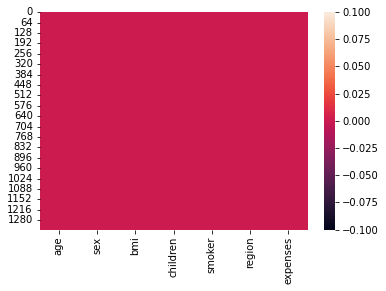

In [7]:
sns.heatmap(df.isna())

#### See the number of male and female

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

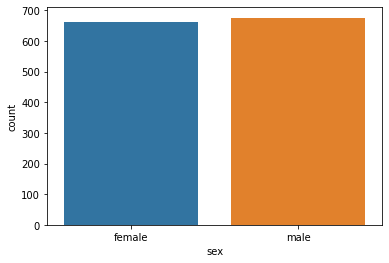

In [8]:
sns.countplot(df['sex'])

In [9]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

#### Conclusion
- There are 14 men more than the female

In [10]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

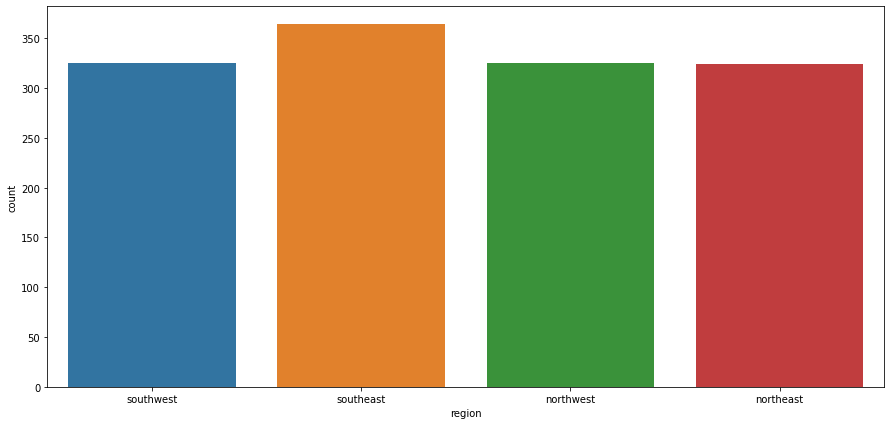

In [11]:
plt.figure(figsize=(15,7))
sns.countplot(df['region'])

#### People are most likely from southeast region

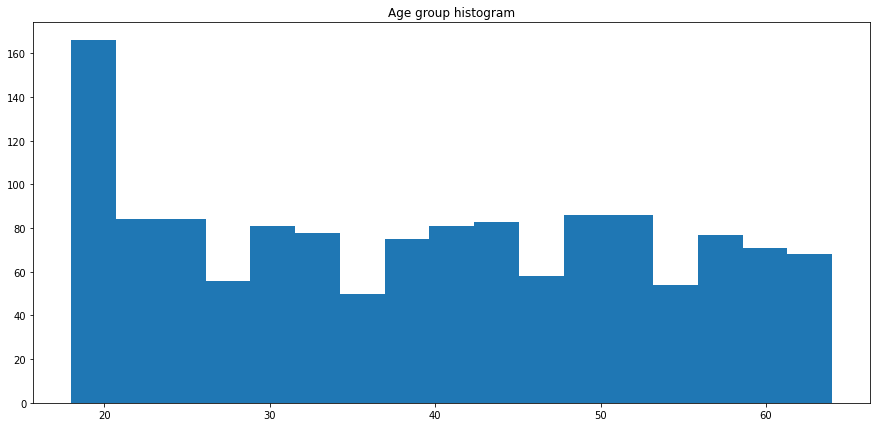

In [12]:
plt.figure(figsize=(15,7))
plt.title("Age group histogram")
plt.hist(df['age'],bins=17)
plt.show()

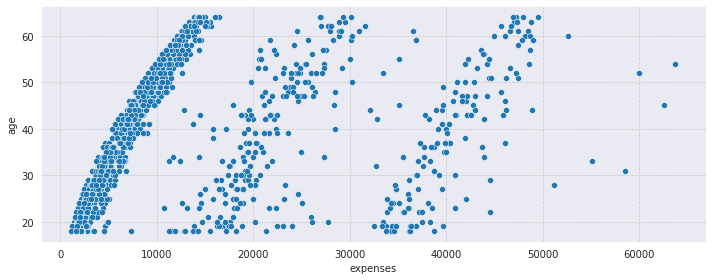

In [13]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(y=df['age'],x=df['expenses'],palette='RdYlGn_r')
plt.tight_layout()
plt.grid(True)
plt.show()

### See smokers vs non smokers

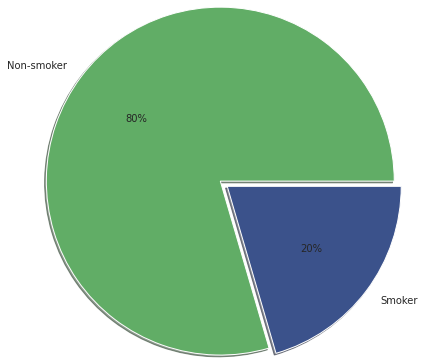

In [14]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
out_df=pd.DataFrame(df.groupby('smoker')['smoker'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['smoker'],labels=['Non-smoker','Smoker'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

In [15]:
pd.DataFrame(df.groupby('smoker')['smoker'].count())

,smoker
smoker,
no,1064
yes,274


In [16]:
df['children'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

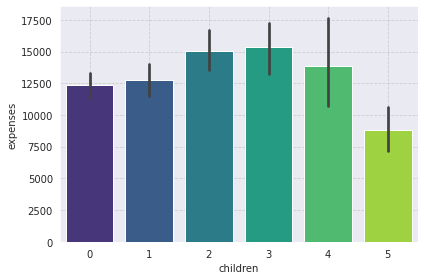

In [17]:
sns.barplot(x='children',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()


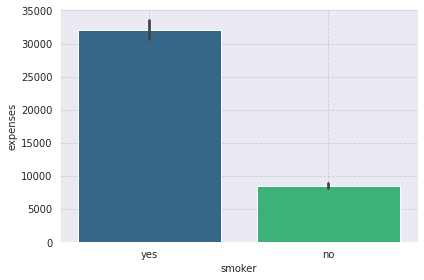

In [18]:
sns.barplot(x='smoker',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

#### See the relation between BMI and expenses

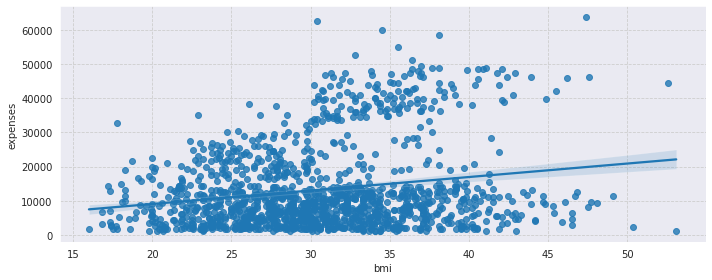

In [19]:
plt.figure(figsize=(10,4))
sns.regplot(x=df['bmi'],y=df['expenses'])
plt.tight_layout()
plt.grid(True)
plt.show()

### Seems like male has higher BMI in comparision to female

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])


In [21]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [22]:
X=df.drop('expenses',axis=1)
y=df.expenses
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

### Random Forest Regressor

In [23]:
lr = RandomForestRegressor()
lr.fit(X_train,y_train)
pr = lr.predict(X_test)

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score

In [25]:
mse = mean_squared_error(y_test, pr)
np.sqrt(mse)

4976.788243638737

In [26]:
lr.score(X,y)

0.9472569217316078

In [34]:
lr.score(X_test,pr)

1.0

### XGBRFREGRESSOR

In [28]:
from xgboost import XGBRFRegressor


/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [35]:
model_xgb = XGBRFRegressor()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [30]:
mse = mean_squared_error(y_test, pred_xgb)
mse

24384332.356574483

In [36]:
r2_score(y_test, pred_xgb)*100,

(83.0677778185705,)